In [8]:
# Set up stlab
from pyplr import stlab
d = stlab.SpectraTuneLab(password='2294b16eea08a15a')
d.turn_off()

LIGHT HUB login success
User authenticated as: admin
The following addresses are defined: [1, 1004, 1023]
Call get_luminaires() / get_device_info() for more info


<Response [200]>

In [9]:
from time import sleep
from pyplr.pupil import PupilCore

p = PupilCore()

p.command('R our_recording')

sleep(1)

p.command('r')

'OK'

In [10]:
p.check_3d_model()

> Refit the 3d model? [y/n]:  y


> Unfreezing 3d model for eye 0
> Unfreezing 3d model for eye 1
> Ask the participant to roll their eyes


> Press "Enter" when ready to freeze the model:  


> Freezing 3d model for eye 0
> Freezing 3d model for eye 1


In [11]:
p = PupilCore()
pgr_future = p.pupil_grabber(topic='pupil.1.3d', seconds=5)

> Grabbing 5 seconds of pupil.1.3d
> PupilGrabber done grabbing 5 seconds of pupil.1.3d


In [12]:
data = pgr_future.result()
data[0]

{'id': 1,
 'topic': 'pupil.1.3d',
 'method': 'pye3d 0.3.0 real-time',
 'norm_pos': [0.16784876632966705, 0.5357826051640242],
 'diameter': 66.88306178680526,
 'confidence': 1.0,
 'timestamp': -897521.462736,
 'sphere': {'center': [1.9370153032777924,
   0.7604942194288267,
   34.11828941883219],
  'radius': 10.392304845413264},
 'projected_sphere': {'center': [111.92141321743986, 102.21857259651082],
  'axes': [207.27601355729462, 207.27601355729462],
  'angle': 0.0},
 'circle_3d': {'center': [-5.38308374713367,
   -0.5369302397662534,
   26.856551357951204],
  'normal': [-0.7043768595416303, -0.12484472679491401, -0.6987610707056983],
  'radius': 2.7289621186110877},
 'diameter_3d': 5.4579242372221755,
 'ellipse': {'center': [32.226963135296074, 89.12973980850734],
  'axes': [43.5863705810125, 66.88306178680526],
  'angle': 9.643704386737241},
 'location': [32.226963135296074, 89.12973980850734],
 'model_confidence': 1.0,
 'theta': 1.695967658824819,
 'phi': -2.3601967758762603}

Text(0.5, 0, 'Pupil timestamp (s)')

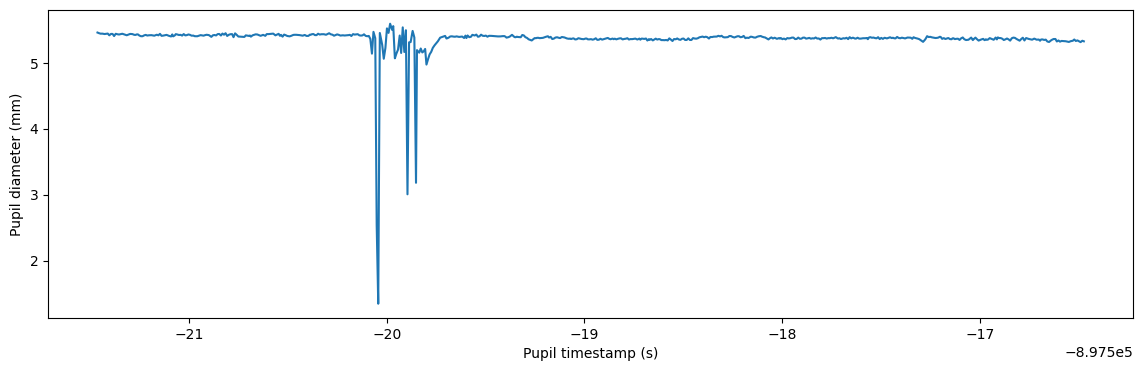

In [13]:
import matplotlib.pyplot as plt
from pyplr.utils import unpack_data_pandas

data = unpack_data_pandas(data, cols=['timestamp','diameter_3d'])
ax = data['diameter_3d'].plot(figsize=(14,4))
ax.set_ylabel('Pupil diameter (mm)')
ax.set_xlabel('Pupil timestamp (s)')